# Data mining midterm
# Xi Yan

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score
import time

%matplotlib inline
plt.style.use('seaborn-white')

### Data cleaning

In [120]:
# Load csv file, display top 5 rows
df = pd.read_csv('worldHapinness_2015_2020.csv')
df.head(5)

,country,Regional indicator,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [121]:
# Verify if there are any missing values, if yes, then drop the NaN value rows
df.info()
df.isnull().sum(axis=0)
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             935 non-null    object 
 1   Regional indicator  933 non-null    object 
 2   happinessScore      935 non-null    float64
 3   GDPperCap           935 non-null    float64
 4   socialSupport       935 non-null    float64
 5   healthLE            935 non-null    float64
 6   freedom             935 non-null    float64
 7   generosity          935 non-null    float64
 8   trustGovernment     934 non-null    float64
 9   year                935 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 73.2+ KB


In [122]:
# Turn regional indicator into numerical categories
df['Regional indicator'] = df['Regional indicator'].astype('category')
df['Regional indicator'] = df['Regional indicator'].cat.codes

"""
0- Central and Eastern Europe
1- Commonwealth of Independent States
2- East Asia
3- Latin America and Caribbean
4- Middle East and North Africa
5- North America and ANZ
6- Southern Asia
7- Southeastern Asia
8- Sub-Saharan Africa
9- Western Europe
"""

'\n0- Central and Eastern Europe\n1- Commonwealth of Independent States\n2- East Asia\n3- Latin America and Caribbean\n4- Middle East and North Africa\n5- North America and ANZ\n6- Southern Asia\n7- Southeastern Asia\n8- Sub-Saharan Africa\n9- Western Europe\n'

In [123]:
# Split data into 2015-2019 and 2020, drop country name since it should not be included in the training model set
df_1519 = df.loc[df['year'].isin([2015, 2016, 2017, 2018, 2019])]
df_20 = df.loc[df['year'] == 2020]


In [124]:
# Set up X, y, drop country names
X = df_1519.drop(['happinessScore', 'country'], axis=1)
y = df_1519['happinessScore']

### 2 Visualization plots

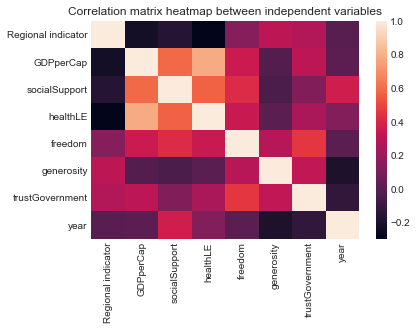

In [125]:
# Data visualization plots (first)
# This plot try to see the correlation between each features
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,).set_title('Correlation matrix heatmap between independent variables')
plt.show()

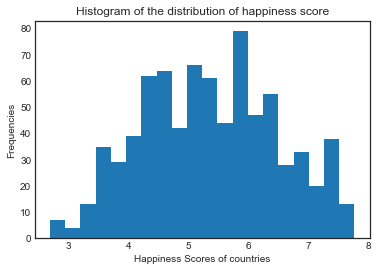

In [126]:
# Data visualization plots (second)
# This plot try to see the distribution of the happiness score
plt.hist(y, bins=20)
plt.xlabel('Happiness Scores of countries')
plt.ylabel('Frequencies')
plt.title('Histogram of the distribution of happiness score')
plt.show()

In [127]:
# Set up train and test sets of data, train data is 75 percent of the dataset, and test is 25 percent.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Prediction: Step 1 Fit a model, First model - Linear regression

In [128]:
# Create linear regression model
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
# Generate target variable prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
# Get the Cross validation error based on negative MSE
CV_error_lm = np.mean(cross_val_score(lm, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print('Train R^2 is', lm.score(X_train, y_train))
print('Test R^2 is', lm.score(X_test, y_test))
print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Cross Validation MSE for linear regression is', np.abs(CV_error_lm))

Train R^2 is 0.7888747512447358
Test R^2 is 0.7144171756012081
Train MSE is 0.27818234246035545
Test MSE is 0.32059351594341645
Cross Validation MSE for linear regression is 0.2894811846579409


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

### Prediction: Step 1 Fit a model, Second model - Polynomial regression degree 1-6

In [129]:
CV_error_poly_list=[] # This stores the value of the negative MSE for polynomial regression
for i in [1, 2, 3, 4, 5, 6]: # fit the model using degree 1 to 6.
    # create polynomial model
    poly_model = PolynomialFeatures(degree=i)
    # Transfer X train test into polynomial
    X_poly_train = poly_model.fit_transform(X_train)
    X_poly_test = poly_model.fit_transform(X_test)
    # Fit polynomial model
    lm_poly = LinearRegression(normalize=True)
    lm_poly.fit(X_poly_train, y_train)
    # Generate target variable prediction
    y_train_pred_poly = lm_poly.predict(X_poly_train)
    y_test_pred_poly = lm_poly.predict(X_poly_test)
    # Get the Cross validation error based on negative MSE
    CV_error_poly = np.mean(cross_val_score(lm_poly, X_poly_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    CV_error_poly_list.append(CV_error_poly)
    print('R^2 for polynomial model degree', i, 'train is', lm_poly.score(X_poly_train, y_train))
    print('R^2 for polynomial model degree', i, 'test is', lm_poly.score(X_poly_test, y_test))
    print('MSE for polynomial model degree', i, 'train is', mean_squared_error(y_train, y_train_pred_poly))
    print('MSE for polynomial model degree', i, 'test is', mean_squared_error(y_test, y_test_pred_poly))
    print('MSE for polynomial model degree', i, 'Cross Validation is', np.abs(CV_error_poly))
    print('\n')

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

R^2 for polynomial model degree 1 train is 0.7888747512447355
R^2 for polynomial model degree 1 test is 0.7144171756012089
MSE for polynomial model degree 1 train is 0.27818234246035584
MSE for polynomial model degree 1 test is 0.32059351594341556
MSE for polynomial model degree 1 Cross Validation is 0.2894811846579414


R^2 for polynomial model degree 2 train is 0.8353049937937609
R^2 for polynomial model degree 2 test is 0.7747715095058485
MSE for polynomial model degree 2 train is 0.21700503794827147
MSE for polynomial model degree 2 test is 0.2528401132321522
MSE for polynomial model degree 2 Cross Validation is 0.26125133633059405


R^2 for polynomial model degree 3 train is 0.9133377857197772
R^2 for polynomial model degree 3 test is 0.7520188213479703
MSE for polynomial model degree 3 train is 0.11418765833744243
MSE for polynomial model degree 3 test is 0.278382140519873
MSE for polynomial model degree 3 Cross Validation is 0.26049191646888864




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

R^2 for polynomial model degree 4 train is 0.984434127652681
R^2 for polynomial model degree 4 test is -9.110701598048777
MSE for polynomial model degree 4 train is 0.02050986728278804
MSE for polynomial model degree 4 test is 11.350211206843463
MSE for polynomial model degree 4 Cross Validation is 36.55446309969225




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

R^2 for polynomial model degree 5 train is 1.0
R^2 for polynomial model degree 5 test is -129.63673100366086
MSE for polynomial model degree 5 train is 9.683042446168745e-23
MSE for polynomial model degree 5 test is 146.6519878847277
MSE for polynomial model degree 5 Cross Validation is 46.0869177404697




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

R^2 for polynomial model degree 6 train is 1.0
R^2 for polynomial model degree 6 test is -107.99378686301017
MSE for polynomial model degree 6 train is 4.1135118761203654e-22
MSE for polynomial model degree 6 test is 122.35575238098109
MSE for polynomial model degree 6 Cross Validation is 44.31846409550424




From the train test MSE, R^2, and Cross validated MSE above, we are able to see that degree 2 is the best model due to bias-variance trade-off. Although degree 3 has a tiny bit smaller CV MSE than degree 2, but it is preferable to choose degree 2 to avoid further overfitting problems. The MSE for test, train, cross validation data is one of the smallest, and the R^2 of test and train data is one of the highest among other degrees.

### Prediction: Step 1 Fit a model, Third model - LASSO regression

In [130]:
# Define the range of alpha
alphas = np.logspace(-5, 5, 300)
# create lasso model
model_lassoCV = LassoCV(normalize=True, alphas=alphas, cv=10).fit(X_train, y_train)
# Generate target variable prediction
y_train_pred_lasso = model_lassoCV.predict(X_train)
y_test_pred_lasso = model_lassoCV.predict(X_test)
# Get the Cross validation error based on negative MSE
CV_error_lasso = np.mean(cross_val_score(model_lassoCV, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print('LassoCV train - R-squared: ', model_lassoCV.score(X_train, y_train))
print('LassoCV test - R-squared: ', model_lassoCV.score(X_test, y_test))
print('MSE for Lasso train is:', mean_squared_error(y_train, y_train_pred_lasso))
print('MSE for Lasso test is:', mean_squared_error(y_test, y_test_pred_lasso))
print('Cross Validation MSE for lasso is:', np.abs(CV_error_lasso))


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

LassoCV train - R-squared:  0.788538420072099
LassoCV test - R-squared:  0.7163718740760224
MSE for Lasso train is: 0.2786254983310917
MSE for Lasso test is: 0.31839918350073815
Cross Validation MSE for lasso is: 0.2888114653838122


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


### why you choose a certain model and features?

Based on these three models, I would conclude that Polynomial degree 2 regression is the best model out of the three models. Since it has the higher R-squared (0.84, 0.77) for both test and train data, while maintaining the lowest MSE (0.21, 0.25) for test and train data among them all. I will further prove it by comparing the cross validation MSE below.

In [131]:
# Compare MSE for linear regression, Polynomial degree 2, Lasso regression
print('Cross Validation MSE for linear regression is', np.abs(CV_error_lm))
print('Cross Calidation MSE for polynomial regression degree 2 is', np.abs(CV_error_poly_list[1])) # index 1 means the second degree
print('Cross Validation MSE for lasso regression is:', np.abs(CV_error_lasso))

Cross Validation MSE for linear regression is 0.2894811846579409
Cross Calidation MSE for polynomial regression degree 2 is 0.26125133633059405
Cross Validation MSE for lasso regression is: 0.2888114653838122


From the Cross validation (cv=10) MSE, we are able to see that polynomial regression degree 2 is the best model, since it also has the lowest MSE among the other 2 models, therefore, we can conclude that polynomial regression degree 2 is the best model for prediction.


### Prediction: Step 2 Feature selection - Forward stepwise selection

In [132]:
arrayCV = []
for i in range(1, len(X_train.columns)): # Select features from 1 to the total number of feature
    model= LinearRegression()
    # Use forward stepwise selection to output features
    sfs = SequentialFeatureSelector(model,
                                n_features_to_select = i,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
    # Fit the model of sfs
    sfs = sfs.fit(X_train,y_train)
    # Get the name of the column of features
    feature_names= X_train.columns.values#column names for X
    print(i, 'features selected by forward sequential selection:', feature_names[sfs.get_support()])
    # Calculate the average CV scores
    CV_score = np.mean(cross_val_score(model,X_train[feature_names[sfs.get_support()]],y_train,cv=10, scoring='neg_mean_squared_error'))
    print('The average CV score for', i, 'feature(s) are', CV_score)
    arrayCV.append(CV_score)
    print('\n')

1 features selected by forward sequential selection: ['GDPperCap']
The average CV score for 1 feature(s) are -0.47699562020937647


2 features selected by forward sequential selection: ['GDPperCap' 'freedom']
The average CV score for 2 feature(s) are -0.36185825617736994


3 features selected by forward sequential selection: ['GDPperCap' 'healthLE' 'freedom']
The average CV score for 3 feature(s) are -0.32960599289130865


4 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom']
The average CV score for 4 feature(s) are -0.3133641468787277


5 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'year']
The average CV score for 5 feature(s) are -0.2959900487544539


6 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'trustGovernment' 'year']
The average CV score for 6 feature(s) are -0.28931377014006415


7 features selected by forward seque

Based on the forward stepwise selection, it shows that the top 3 most significant feature is GDPperCAP, freedom, and healthLE and the least 3 significant feature is regional indicator, trust government, generosity.

Let's see if dropping the regional indicator and trust government is going to increase R^2 and decrease MSE for Polynomial degree 2 model or not.

### Prediction: Step 2 Feature selection - eliminate 'Regional indicator' and 'generosity' features

In [133]:
# This chunk is to test what if we eliminate one or two of the least significant features
# eliminate 'Regional indicator' and 'trustGovernment' features
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'year', 'trustGovernment']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'year', 'trustGovernment']]
# create polynomial degree 2 model
poly_model = PolynomialFeatures(degree=2)
# Transfer X train test into polynomial
X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)
# Fit polynomial model
lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
# Generate target variable prediction
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)
# Get the Cross validation error based on negative MSE
CV_error_poly3 = np.mean(cross_val_score(lm_poly, X_poly_train_selected, y_train, cv=10, scoring='neg_mean_squared_error'))
print('Eliminated Regional indicator and generosity features')
print('Cross Validation MSE for polynomial model degree 2 is',abs(CV_error_poly3))
print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))
print('\n')

# eliminate 'Regional indicator' features
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment', 'year']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment', 'year']]
# create polynomial degree 2 model
poly_model = PolynomialFeatures(degree=2)
# Transfer X train test into polynomial
X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)
# Fit polynomial model
lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
# Generate target variable prediction
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)
# Get the Cross validation error based on negative MSE
CV_error_poly3 = np.mean(cross_val_score(lm_poly, X_poly_train_selected, y_train, cv=10, scoring='neg_mean_squared_error'))
print('Eliminated Regional indicator features')
print('Cross Validation MSE for polynomial model degree 2 is',abs(CV_error_poly3))
print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))

Eliminated Regional indicator and generosity features
Cross Validation MSE for polynomial model degree 2 is 0.28019282640380594
MSE for polynomial model degree 2 train is 0.25015950351200783
MSE for polynomial model degree 2 test is 0.3018844785381998
R^2 for polynomial model degree 2 train is 0.8101425599470145
R^2 for polynomial model degree 2 test is 0.7310830764328002


Eliminated Regional indicator features
Cross Validation MSE for polynomial model degree 2 is 0.28054955987166785
MSE for polynomial model degree 2 train is 0.242577196914415
MSE for polynomial model degree 2 test is 0.29400879433861543
R^2 for polynomial model degree 2 train is 0.815897117739566
R^2 for polynomial model degree 2 test is 0.7380986897435422


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

The above code show that dropping any of the feature will increase MSE and reduce R^2 for both of train and test of the Polynomial degree 2 model. It will also largely increase the cross validation MSE. Therefore, it shows that all features are significant to the model, therefore we should not eliminate any of the features. I will further prove this by showing the minimum CV_error graph.

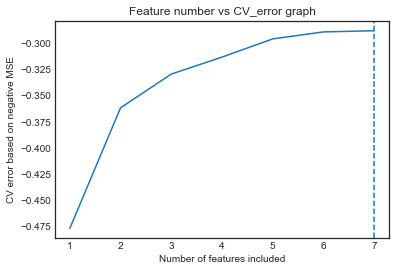

In [134]:
# Since the scoring method is negative MSE, so the smallest CV error is the highest(max) negative MSE
cvs_min = arrayCV.index(max(arrayCV))
feature_num = range(1,len(X.columns))
plt.plot(feature_num, arrayCV)
# The reason why x=(cvs_min+1) is beceause cvs_min is from 0 to 6 and feature_num is from 1 to 7, so we have to add 1.
plt.axvline(x=(cvs_min+1), linestyle='--')
plt.title('Feature number vs CV_error graph')
plt.xlabel('Number of features included')
plt.ylabel('CV error based on negative MSE')
plt.show()

From this graph, we can further prove that all features of the X dataset are significant, and no any of the feature should be eliminated from the training model, otherwise it would result in a higher CV_error, higher MSE, and R^2.

### Prediction: Step 3 Predict 2020

In [135]:
# Rerun the polynomial degree 2 model
poly_model = PolynomialFeatures(degree=2)
# Transfer X train test into polynomial
X_poly_train = poly_model.fit_transform(X_train)
X_poly_test = poly_model.fit_transform(X_test)
# Fit polynomial model
lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train, y_train)
# Generate target variable prediction
y_train_pred_poly = lm_poly.predict(X_poly_train)
y_test_pred_poly = lm_poly.predict(X_poly_test)
# Get the Cross validation error based on negative MSE
CV_error_poly3 = np.mean(cross_val_score(lm_poly, X_poly_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print('Cross Validation MSE for polynomial model degree 2 is',abs(CV_error_poly3))
print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test, y_test))

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

Cross Validation MSE for polynomial model degree 2 is 0.26125133633059405
MSE for polynomial model degree 2 train is 0.21700503794827147
MSE for polynomial model degree 2 test is 0.2528401132321522
R^2 for polynomial model degree 2 train is 0.8353049937937609
R^2 for polynomial model degree 2 test is 0.7747715095058485


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [136]:
# Predict 2020
X_2020 = df_20.drop(['happinessScore', 'country'], axis=1)
y_2020 = df_20['happinessScore']
X_poly_2020 = poly_model.fit_transform(X_2020)
y_pred_poly_2020 = lm_poly.predict(X_poly_2020)

### What are your predicted scores for the top 10 most happy countries and the bottom 10 less happy countries?
### Prediction: Step 3 Predict 2020 - Top 10 and bottom 10 countries

In [137]:
# Combine the y and country name column
y_2020_pred_list = list(y_pred_poly_2020)
df_20_list = list(df_20['country'])
pred_2020_result = pd.DataFrame({'country':df_20_list, 'prediction result':y_2020_pred_list})
print('The top 10 highest happiness score country is', pred_2020_result.nlargest(10, 'prediction result'))
print('The bottom 10 highest happiness score country is', pred_2020_result.nsmallest(10, 'prediction result'))

The top 10 highest happiness score country is            country  prediction result
3          Iceland           6.764555
22          France           6.681299
2      Switzerland           6.674264
8          Austria           6.614838
4           Norway           6.597297
15         Ireland           6.590107
5      Netherlands           6.486921
27           Spain           6.485599
9       Luxembourg           6.466128
12  United Kingdom           6.457056
The bottom 10 highest happiness score country is                       country  prediction result
149                    Rwanda           2.621388
152               Afghanistan           3.024488
151               South Sudan           3.032646
139                   Burundi           3.099356
148  Central African Republic           3.168476
141                     Haiti           3.206162
85                      Benin           3.310746
134                      Togo           3.504465
133                   Comoros           3.6040

### How good are the happiness score predictions with your final model?
### Prediction: Step 3 Predict 2020 - Accuracy

In [138]:
print('MSE for polynomial model degree 2 in 2020 dataset is', mean_squared_error(y_2020, y_pred_poly_2020))
print('R^2 for polynomial model degree 2 in 2020 dataset is', lm_poly.score(X_poly_2020, y_2020))

MSE for polynomial model degree 2 in 2020 dataset is 0.363537424779952
R^2 for polynomial model degree 2 in 2020 dataset is 0.7042148363111569


From the above MSE and R^2, we are able to say that the model is pretty accurate of the dataset, with an MSE as small as 0.36 and R^2 to be 0.7, this is pretty good comparing to other models.

### Classification: change continuous target variables into dummies

In this case, I want to classify whether a country is happy or not, therefore, I will transform the country happiness score into happy(1) and not_happy(0), and predict the result using classification models.

To classify happy/not happy, I will split the score based on average score, for the happiness score below average will be classified as not happy, vice versa.

In [139]:
# Convert continuous to 0 and 1 base on average score
avg = y_train.sum() / len(y_train)
y_train.loc[y_train < avg] = 0
y_train.loc[y_train >= avg] = 1
y_test.loc[y_test < avg] = 0
y_test.loc[y_test >= avg] = 1

### Classification: Step 1 Fit a model, First model - KNN

Firstly, we need to know which number of K (number of neighbors) is the most accurate for our model

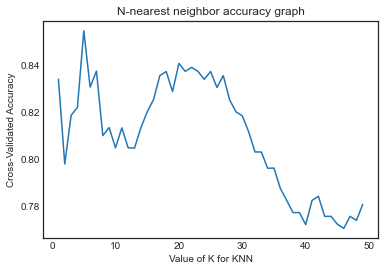

The optimal number of neighbors for my KNN model is: 4


In [140]:
accuracy = []
# range(1, 50) tests KNN neighbors from 1 to 50 to see which is the highest
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    # Cross Validation K = 10, scoring based on accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy.append(sum(scores)/len(scores))

plt.plot(range(1,50), accuracy)
plt.title('N-nearest neighbor accuracy graph')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print('The optimal number of neighbors for my KNN model is:', accuracy.index(max(accuracy)))

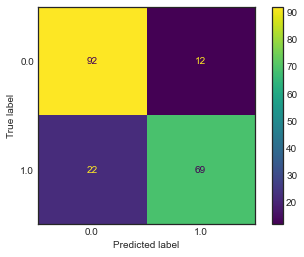

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       104
         1.0       0.85      0.76      0.80        91

    accuracy                           0.83       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.83      0.83      0.82       195



In [141]:
# Fit the model using number of nearest neighbor of 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
# predict y test using KNN model
y_KNN_pred = knn.predict(X_test)
# Generate confusion matrix
c_matrix = confusion_matrix(y_test, y_KNN_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=knn.classes_)
disp_knn.plot()
plt.show()
print(classification_report(y_test, y_KNN_pred))

### Classification: Step 1 Fit a model, Second model - Naive Bayes

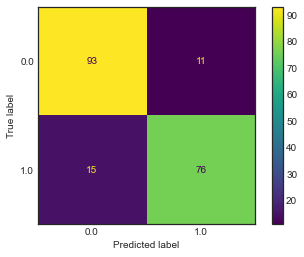

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       104
         1.0       0.87      0.84      0.85        91

    accuracy                           0.87       195
   macro avg       0.87      0.86      0.87       195
weighted avg       0.87      0.87      0.87       195



In [142]:
# Fit the model using Naive Bayes
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
# predict y test using Naive Bayes model
y_NB_pred2 = naiveBayes.predict(X_test)
# Generate confusion matrix
con_matrix2 = confusion_matrix(y_test, y_NB_pred2)
disp_NB = ConfusionMatrixDisplay(confusion_matrix=con_matrix2, display_labels=naiveBayes.classes_)
disp_NB.plot()
plt.show()
print(classification_report(y_test, y_NB_pred2))

We already proved that reducing any features will result in to a higher CV_error, so in this case, we do not have to perform feature selection anymore, all features are significant to the models.

### why you choose a certain model and features?

Both of these model show a pretty high accuracy score on classifying whether a country is happy or not. However, Naive Bayes have a slightly higher accuracy scores and higher precision of classification of happy or not happy. Therefore, I will choose Naive Bayes as the model that are more fitted as the final model.

### Does your final model have a higher difficulty classifying a certain class? Justify.

The Naive Bayes model does not have a higher difficulty classifying a certain class, both of the classification are highly precise, this is due to the independence assumption of the Naive Bayes model.

### How good is the classification of your final model?

In [143]:
# Calculated the accuracy score, (also shown in the classification report)
acc = metrics.accuracy_score(y_test, y_NB_pred2)
print(acc)

0.8666666666666667


Based on the classification report and the calculation of accuracy score, which is 87%, it shows that the model can classify whether a country is happy or not precisely with a pretty high accuracy score.

### Reference
1. Convert categorical data in pandas dataframe https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/46186626
2. How do I select rows from a DataFrame based on column values? https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
3. Correlation heatmap https://stackoverflow.com/questions/39409866/correlation-heatmap
4. Lab2_F21_A2_Answers https://canvas.cmu.edu/courses/23631/files/7198232?module_item_id=4968655&fd_cookie_set=1
5. Homework2_F21_Mini2_A2_ANSWERS https://canvas.cmu.edu/courses/23631/files/7263076?module_item_id=4976096&fd_cookie_set=1
6. How to convert ndarray to series in python https://stackoverflow.com/questions/30564172/how-to-convert-ndarray-to-series-in-python
7. How to Select Top N Rows with the Largest Values in a Column(s) in Pandas? https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
8. sklearn.metrics.accuracy_score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
